# Image processing for material property estimation

### Compaction experiment with CT images

This notebook contains the exact same steps as in `materials_testing_notebook.py`, with the following differences:
* the content only goes up to the point of processing input images - in this case, **grayscale** images - into a two-phase (binary) material
* here, we import the `Microstructure` class and methods from the `uumatsci_utils` library (included with this file)
* some cells have been completely deleted - they were for stand-alone testing and irrelevant in the context of the example

In [10]:
# import the uumatsci_utils.py library
import uumatsci_utils as uumat
import numpy as np

ModuleNotFoundError: No module named 'uumatsci_utils'

#### Step 1: loading image files

Here, we load the grayscale image files containing the raw CT images - each image in this case corresponds to a different stress state over the compaction experiment. 

(1600, 1600)
(1600, 1600)
(1600, 1600)
(1600, 1600)
(1600, 924)


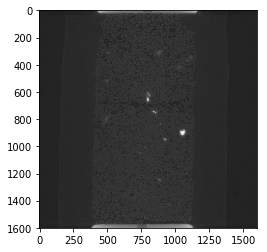

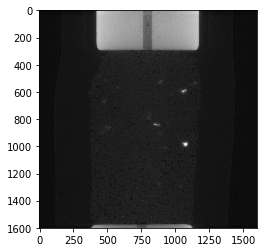

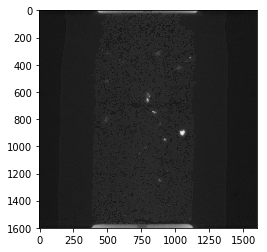

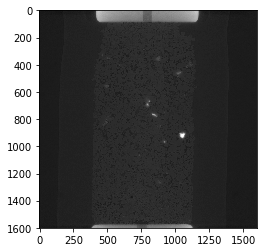

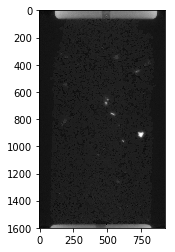

In [2]:
import matplotlib
# matplotlib.use('Qt5Agg')
# matplotlib.use('MACOSX')
import matplotlib.pyplot as plt

# %% set paths
path = '/Users/ivanvasconcelos/Work/Material/'
input_path = path + 'Data/Suzanne/CT_data/'

image_file = input_path + '6.5_GRO2_004_31MPA_30MPA_10MPA_XZ.tif'
image_file2 = input_path + '6.5_GRO2_049_151MPA_50MPA_10MPA_XZ.tif'

image_file3 = input_path + '6.5_GRO2_005_41MPA_40MPA_10MPA_XZ.tif'
image_file4 = input_path + '6.5_GRO2_047_142MPA_50MPA_10MPA_XZ.tif'

image_file5 = input_path + '6.5_GRO2_038_126MPA_50MPA_10MPA_XZ.tif'

# %% alternative image read method
img_ct = plt.imread(image_file)
print(img_ct.shape)

plt.figure()
plt.imshow(img_ct, cmap=plt.cm.gray)


img2_ct = plt.imread(image_file2)
print(img2_ct.shape)

plt.figure()
plt.imshow(img2_ct, cmap=plt.cm.gray)

img3_ct = plt.imread(image_file3)
print(img3_ct.shape)

plt.figure()
plt.imshow(img3_ct, cmap=plt.cm.gray)

img4_ct = plt.imread(image_file4)
print(img4_ct.shape)

plt.figure()
plt.imshow(img4_ct, cmap=plt.cm.gray)

img5_ct = plt.imread(image_file5)
print(img5_ct.shape)

plt.figure()
plt.imshow(img5_ct, cmap=plt.cm.gray)


#### Step 2: convert images into microstructure

In the `uumatsci_utils.py` library, we define a class called `Microstructure` - that object contains:
* the actual microstructure information: both the binary two-phase structure, and the final processed image from which said microstructure is estimated
* methods - i.e., class-based functions - to calculate microstructure descriptors

For now, let's focus on one method of the `Microstructure` class - called `twoDCTimage2structure`: this is designed to take a 2D grayscale image (such as from a CT scanner) into a two-phase microstructure, that later will be used to estimate microstructure descriptors.

(541, 541)
19 520


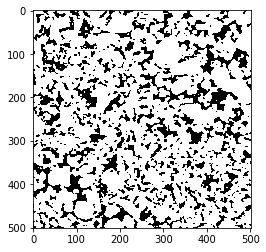

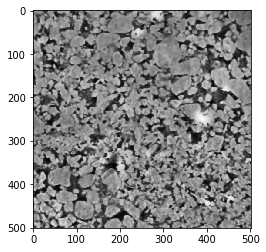

<Figure size 432x288 with 0 Axes>

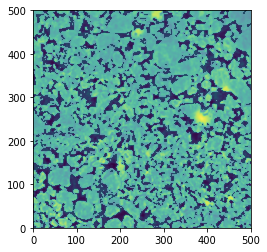

<class 'uumatsci_utils.Microstructure'>
(501, 501)
Number of inclusions: 63193
Volume fraction: 0.25176393719546936
(2, 63193)
0  23
0  24
0  25
0  26
0  27
0  28
0  29
0  30
0  31
0  32


<Figure size 432x288 with 0 Axes>

In [3]:
### Example image 1

# this 'par' is a dictionary with the arguments passed to the image-to-structure method
par={'name':'test_microstructure','begx': 1000, 'begy': 500, 'nsamp': 501, 'edge_buffer': 20,
    'equalisation': True, 'equal_method': 'adaptive', 'stretch_percentile': 2,
    'clip_limit': 0.03, 'tvdnoise': True, 'tv_weight': 0.15, 'tv_eps': 2e-04,
    'median_filter': False, 'median_filter_length': 3,
    'thresholding_method': 'otsu', 'thresholding_weight': 0.85, 'nbins': 256,
    'make_figs': True, 'fig_res': 400, 'fig_path':'./Plots/'}


# test function
imct_microstructure = uumat.twoDCTimage2structure(img_ct, par)
print(type(imct_microstructure))
imm = imct_microstructure.sourceimage
print(imm.shape)
#img_adaptive = exposure.equalize_adapthist(imm, clip_limit=par['clip_limit'])

# test volume fraction calculation
imct_microstructure.volumefraction()
imct_nincl = imct_microstructure.ninclusion
imct_phi = imct_microstructure.volfracvalue
print("Number of inclusions: %s" % imct_nincl)
print("Volume fraction: %s" % imct_phi)

# test listing inclusion indeces
imct_microstructure.list_inclusion_indeces()
imct_inclist = imct_microstructure.inclusion_index_list
print(imct_inclist.shape)
for i in range(10):
    print("%s  %s" % (imct_inclist[0, i], imct_inclist[1, i]))

#plt.figure()
#plt.imshow(imct_microstructure.structure, cmap=plt.cm.gray)

(541, 541)
19 520


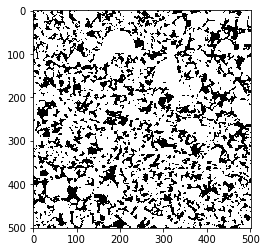

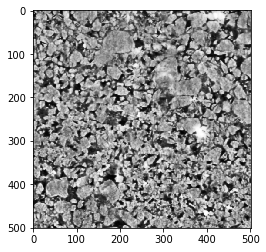

<Figure size 432x288 with 0 Axes>

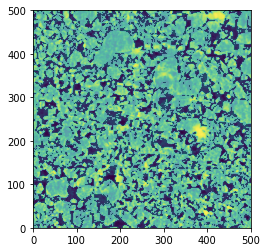

<class 'uumatsci_utils.Microstructure'>
(501, 501)
Number of inclusions: 71071
Volume fraction: 0.28315026633360024
(2, 71071)
0  17
0  18
0  19
0  20
0  21
0  55
0  56
0  62
0  63
0  64


<Figure size 432x288 with 0 Axes>

In [4]:
### Example image 2


par2={'name':'test_microstructure2','begx': 1000, 'begy': 500, 'nsamp': 501, 'edge_buffer': 20,
    'equalisation': True, 'equal_method': 'adaptive', 'stretch_percentile': 2,
    'clip_limit': 0.03, 'tvdnoise': True, 'tv_weight': 0.15, 'tv_eps': 2e-04,
    'median_filter': False, 'median_filter_length': 3,
    'thresholding_method': 'otsu', 'thresholding_weight': 0.80, 'nbins': 256,
    'make_figs': True, 'fig_res': 400, 'fig_path':'./Plots/'}


# test function
imct2_microstructure = uumat.twoDCTimage2structure(img2_ct, par2)
print(type(imct_microstructure))
imm2 = imct2_microstructure.sourceimage
print(imm2.shape)
#img_adaptive = exposure.equalize_adapthist(imm, clip_limit=par['clip_limit'])

# test volume fraction calculation
imct2_microstructure.volumefraction()
imct2_nincl = imct2_microstructure.ninclusion
imct2_phi = imct2_microstructure.volfracvalue
print("Number of inclusions: %s" % imct2_nincl)
print("Volume fraction: %s" % imct2_phi)

# test listing inclusion indeces
imct2_microstructure.list_inclusion_indeces()
imct2_inclist = imct2_microstructure.inclusion_index_list
print(imct2_inclist.shape)
for i in range(10):
    print("%s  %s" % (imct2_inclist[0, i], imct2_inclist[1, i]))

#plt.figure()
#plt.imshow(imct_microstructure.structure, cmap=plt.cm.gray)

(541, 541)
19 520


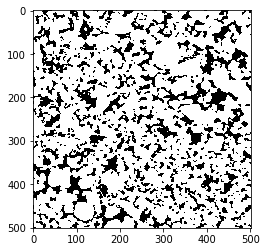

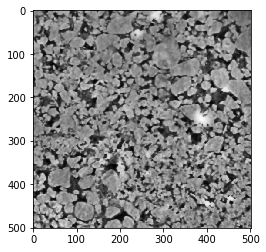

<Figure size 432x288 with 0 Axes>

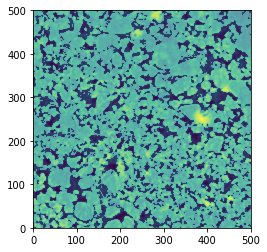

<class 'uumatsci_utils.Microstructure'>
(501, 501)
Number of inclusions: 63757
Volume fraction: 0.2540109401954574
(2, 63757)
0  0
0  1
0  25
0  26
0  27
0  28
0  29
0  30
0  31
0  32


<Figure size 432x288 with 0 Axes>

In [5]:
### Example image 3

# more samples
par={'name':'test_microstructure3','begx': 1000, 'begy': 500, 'nsamp': 501, 'edge_buffer': 20,
    'equalisation': True, 'equal_method': 'adaptive', 'stretch_percentile': 2,
    'clip_limit': 0.03, 'tvdnoise': True, 'tv_weight': 0.15, 'tv_eps': 2e-04,
    'median_filter': False, 'median_filter_length': 3,
    'thresholding_method': 'otsu', 'thresholding_weight': 0.85, 'nbins': 256,
    'make_figs': True, 'fig_res': 400, 'fig_path':'./Plots/'}


# test function
imct3_microstructure = uumat.twoDCTimage2structure(img3_ct, par)
print(type(imct3_microstructure))
imm = imct3_microstructure.sourceimage
print(imm.shape)
#img_adaptive = exposure.equalize_adapthist(imm, clip_limit=par['clip_limit'])

# test volume fraction calculation
imct3_microstructure.volumefraction()
imct3_nincl = imct3_microstructure.ninclusion
imct3_phi = imct3_microstructure.volfracvalue
print("Number of inclusions: %s" % imct3_nincl)
print("Volume fraction: %s" % imct3_phi)

# test listing inclusion indeces
imct3_microstructure.list_inclusion_indeces()
imct3_inclist = imct3_microstructure.inclusion_index_list
print(imct3_inclist.shape)
for i in range(10):
    print("%s  %s" % (imct3_inclist[0, i], imct3_inclist[1, i]))

#plt.figure()
#plt.imshow(imct_microstructure.structure, cmap=plt.cm.gray)

(541, 541)
19 520


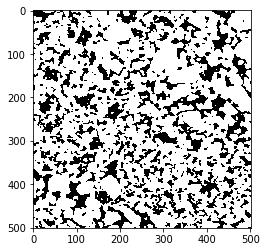

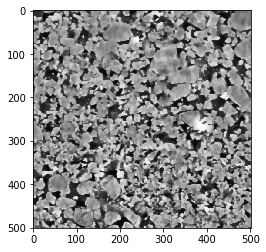

<Figure size 432x288 with 0 Axes>

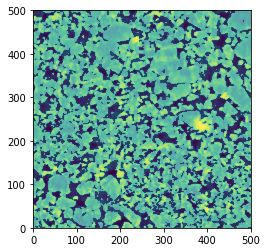

<class 'uumatsci_utils.Microstructure'>
(501, 501)
Number of inclusions: 71515
Volume fraction: 0.28491918358891
(2, 71515)
0  0
0  1
0  2
0  3
0  4
0  5
0  6
0  7
0  8
0  9


<Figure size 432x288 with 0 Axes>

In [6]:
### Example image 4

# more samples
par={'name':'test_microstructure4','begx': 1000, 'begy': 500, 'nsamp': 501, 'edge_buffer': 20,
    'equalisation': True, 'equal_method': 'adaptive', 'stretch_percentile': 2,
    'clip_limit': 0.03, 'tvdnoise': True, 'tv_weight': 0.15, 'tv_eps': 2e-04,
    'median_filter': False, 'median_filter_length': 3,
    'thresholding_method': 'otsu', 'thresholding_weight': 0.85, 'nbins': 256,
    'make_figs': True, 'fig_res': 400, 'fig_path':'./Plots/'}


# test function
imct4_microstructure = uumat.twoDCTimage2structure(img4_ct, par)
print(type(imct4_microstructure))
imm = imct4_microstructure.sourceimage
print(imm.shape)
#img_adaptive = exposure.equalize_adapthist(imm, clip_limit=par['clip_limit'])

# test volume fraction calculation
imct4_microstructure.volumefraction()
imct4_nincl = imct4_microstructure.ninclusion
imct4_phi = imct4_microstructure.volfracvalue
print("Number of inclusions: %s" % imct4_nincl)
print("Volume fraction: %s" % imct4_phi)

# test listing inclusion indeces
imct4_microstructure.list_inclusion_indeces()
imct4_inclist = imct4_microstructure.inclusion_index_list
print(imct4_inclist.shape)
for i in range(10):
    print("%s  %s" % (imct4_inclist[0, i], imct4_inclist[1, i]))

#plt.figure()
#plt.imshow(imct_microstructure.structure, cmap=plt.cm.gray)

(541, 541)
19 520


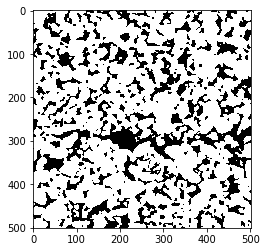

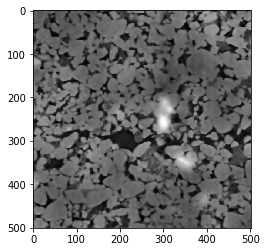

<Figure size 432x288 with 0 Axes>

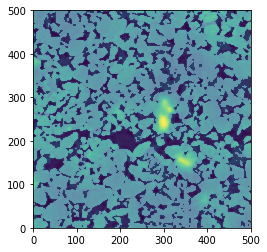

<class 'uumatsci_utils.Microstructure'>
(501, 501)
Number of inclusions: 67345
Volume fraction: 0.2683057039613388
(2, 67345)
0  36
0  37
0  38
0  39
0  40
0  41
0  42
0  43
0  44
0  45


<Figure size 432x288 with 0 Axes>

In [7]:
### Example image 5


par1b={'name':'test_microstructure1b','begx': 400, 'begy': 500, 'nsamp': 501, 'edge_buffer': 20,
    'equalisation': True, 'equal_method': 'adaptive', 'stretch_percentile': 2,
    'clip_limit': 0.03, 'tvdnoise': True, 'tv_weight': 0.15, 'tv_eps': 2e-04,
    'median_filter': False, 'median_filter_length': 3,
    'thresholding_method': 'otsu', 'thresholding_weight': 0.97, 'nbins': 256,
    'make_figs': True, 'fig_res': 400, 'fig_path':'./Plots/'}


# test function
imct1b_microstructure = uumat.twoDCTimage2structure(img_ct, par1b)
print(type(imct1b_microstructure))
imm1b = imct1b_microstructure.sourceimage
print(imm1b.shape)
#img_adaptive = exposure.equalize_adapthist(imm, clip_limit=par['clip_limit'])

# test volume fraction calculation
imct1b_microstructure.volumefraction()
imct1b_nincl = imct1b_microstructure.ninclusion
imct1b_phi = imct1b_microstructure.volfracvalue
print("Number of inclusions: %s" % imct1b_nincl)
print("Volume fraction: %s" % imct1b_phi)

# test listing inclusion indeces
imct1b_microstructure.list_inclusion_indeces()
imct1b_inclist = imct1b_microstructure.inclusion_index_list
print(imct1b_inclist.shape)
for i in range(10):
    print("%s  %s" % (imct1b_inclist[0, i], imct1b_inclist[1, i]))

#plt.figure()
#plt.imshow(imct_microstructure.structure, cmap=plt.cm.gray)

(541, 541)
19 520


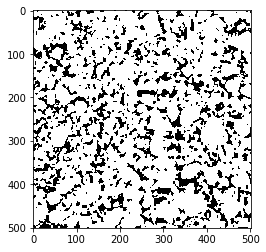

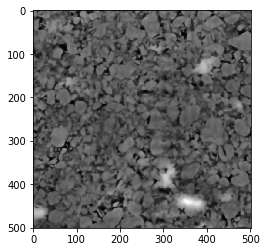

<Figure size 432x288 with 0 Axes>

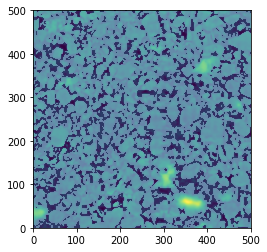

<class 'uumatsci_utils.Microstructure'>
(501, 501)
Number of inclusions: 55746
Volume fraction: 0.222094732690308
(2, 55746)
0  9
0  10
0  11
0  12
0  13
0  14
0  103
0  104
0  105
0  106


<Figure size 432x288 with 0 Axes>

In [8]:
### Example image 6

par2b={'name':'test_microstructure2b','begx': 400, 'begy': 500, 'nsamp': 501, 'edge_buffer': 20,
    'equalisation': True, 'equal_method': 'adaptive', 'stretch_percentile': 2,
    'clip_limit': 0.03, 'tvdnoise': True, 'tv_weight': 0.15, 'tv_eps': 2e-04,
    'median_filter': False, 'median_filter_length': 3,
    'thresholding_method': 'otsu', 'thresholding_weight': 0.85, 'nbins': 256,
    'make_figs': True, 'fig_res': 400, 'fig_path':'./Plots/'}


# test function
imct2b_microstructure = uumat.twoDCTimage2structure(img2_ct, par2b)
print(type(imct2b_microstructure))
imm2b = imct2b_microstructure.sourceimage
print(imm2b.shape)
#img_adaptive = exposure.equalize_adapthist(imm, clip_limit=par['clip_limit'])

# test volume fraction calculation
imct2b_microstructure.volumefraction()
imct2b_nincl = imct2b_microstructure.ninclusion
imct2b_phi = imct2b_microstructure.volfracvalue
print("Number of inclusions: %s" % imct2b_nincl)
print("Volume fraction: %s" % imct2b_phi)

# test listing inclusion indeces
imct2b_microstructure.list_inclusion_indeces()
imct2b_inclist = imct2b_microstructure.inclusion_index_list
print(imct2b_inclist.shape)
for i in range(10):
    print("%s  %s" % (imct2b_inclist[0, i], imct2b_inclist[1, i]))

#plt.figure()
#plt.imshow(imct_microstructure.structure, cmap=plt.cm.gray)

#### Step 3: SMD calculations

In the `uumatsci_utils.py` library, there is a method called `estimate_npolytope_functions` - which:
* runs the **C++** executable `Sample_Pn_UU`: this calculates S2 and Polytope functions
* manipulates the necessary I/O files in a way that attempts to protects subsenquent calls of this method not to get mixed up with input/information from previous calls

**Important:** the C++ code must be compiled separately, and the parameters `file_path`, `cpp_path` and `runtime_path` **must be set carefully** to ensure result files are properly documented nad kept separately.

Below are the initial results using the *Slochteren compaction experiment data from Suzanne Hangx*. Plese note these results are unpublished and therefore **confidential**.

In [9]:
# Set up to run C++ polytope codes
# test writing Mconfig files
cpathPn = '/Users/ivanvasconcelos/Software/Material_Modelling/YJiao/Polytope/'
runtimePn ='/Users/ivanvasconcelos/Work/Material/Code/Material/material_lib/Runtime_Pn/'
outputPn = '/Users/ivanvasconcelos/Work/Material/Code/Material/material_lib/Runtime_Pn/Output/'

# test polytope estimations
imct_microstructure.estimate_npolytope_functions(file_path=outputPn, cppcode_path=cpathPn, runtime_path=runtimePn, verbose=False)
imct_PnS2 = imct_microstructure.polytope_S2
print(imct_PnS2.shape)
print(imct_PnS2[0:10,:])

test_microstructure_Mconfig.txt file exists in: /Users/ivanvasconcelos/Work/Material/Code/Material/material_lib/Runtime_Pn/Output/
Mconfig.txt file replaced in current directory
These are assumed to be the same: Pn estimation will proceed.
(250, 2)
[[0.       0.251764]
 [1.       0.219005]
 [2.       0.18835 ]
 [3.       0.161728]
 [4.       0.139984]
 [5.       0.122711]
 [6.       0.109229]
 [7.       0.098956]
 [8.       0.091043]
 [9.       0.084918]]


In [10]:
# Pn 2nd sample

imct2_microstructure.estimate_npolytope_functions(file_path=outputPn, cppcode_path=cpathPn, runtime_path=runtimePn, verbose=False)
imct2_PnS2 = imct2_microstructure.polytope_S2
print(imct2_PnS2.shape)
print(imct2_PnS2[0:10,:])

test_microstructure2_Mconfig.txt file exists in: /Users/ivanvasconcelos/Work/Material/Code/Material/material_lib/Runtime_Pn/Output/
Mconfig.txt file replaced in current directory
These are assumed to be the same: Pn estimation will proceed.
(250, 2)
[[0.       0.28315 ]
 [1.       0.240228]
 [2.       0.201724]
 [3.       0.170726]
 [4.       0.147599]
 [5.       0.130647]
 [6.       0.118346]
 [7.       0.109352]
 [8.       0.102482]
 [9.       0.097426]]


/Users/ivanvasconcelos/Work/Material/Code/Material/material_lib


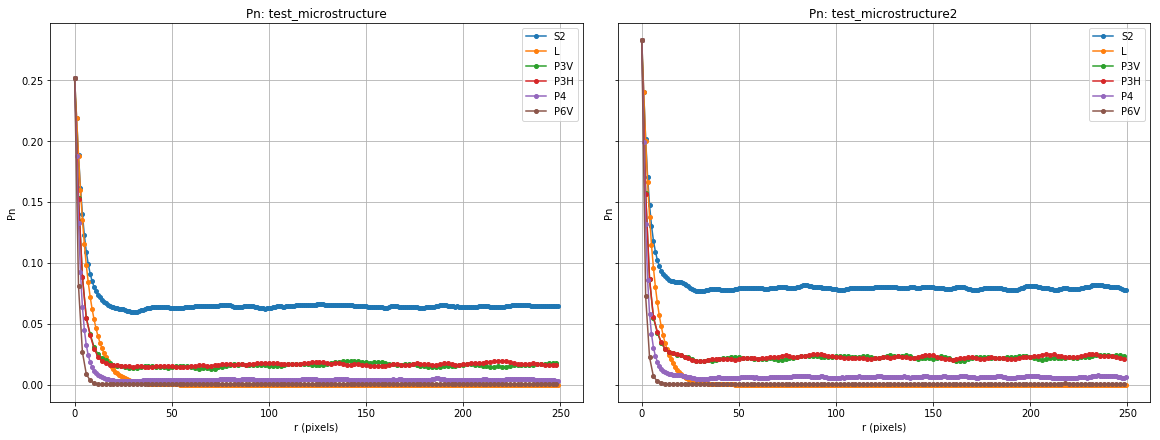

In [11]:
# plot Pn for frist 2 samples
import os

print(os.getcwd())
rows = 1
cols = 2
figsize = (16, 6)
fig, axes = plt.subplots(rows, cols, sharey=True, figsize=figsize, constrained_layout=True)

axes[0].set_title('Pn: %s' % imct_microstructure.name)
axes[0].set_ylabel('Pn')
axes[0].set_xlabel('r (pixels)')
axes[0].plot(imct_PnS2[:,0], imct_PnS2[:,1], 'o', ls='-', ms=4, markevery=None, label='S2')
axes[0].plot(imct_microstructure.polytope_L[:,0], imct_microstructure.polytope_L[:,1], 'o', ls='-', ms=4, markevery=None, label='L')
axes[0].plot(imct_microstructure.polytope_P3V[::2,0], imct_microstructure.polytope_P3V[::2,1], 'o', ls='-', ms=4, markevery=None, label='P3V')
axes[0].plot(imct_microstructure.polytope_P3H[::2,0], imct_microstructure.polytope_P3H[::2,1], 'o', ls='-', ms=4, markevery=None, label='P3H')
axes[0].plot(imct_microstructure.polytope_P4[:,0], imct_microstructure.polytope_P4[:,1], 'o', ls='-', ms=4, markevery=None, label='P4')
axes[0].plot(imct_microstructure.polytope_P6V[::2,0], imct_microstructure.polytope_P6V[::2,1], 'o', ls='-', ms=4, markevery=None, label='P6V')

axes[0].grid(True)
axes[0].legend()

axes[1].set_title('Pn: %s' % imct2_microstructure.name)
axes[1].set_ylabel('Pn')
axes[1].set_xlabel('r (pixels)')
axes[1].plot(imct2_PnS2[:,0], imct2_PnS2[:,1], 'o', ls='-', ms=4, markevery=None, label='S2')
axes[1].plot(imct2_microstructure.polytope_L[:,0], imct2_microstructure.polytope_L[:,1], 'o', ls='-', ms=4, markevery=None, label='L')
axes[1].plot(imct2_microstructure.polytope_P3V[::2,0], imct2_microstructure.polytope_P3V[::2,1], 'o', ls='-', ms=4, markevery=None, label='P3V')
axes[1].plot(imct2_microstructure.polytope_P3H[::2,0], imct2_microstructure.polytope_P3H[::2,1], 'o', ls='-', ms=4, markevery=None, label='P3H')
axes[1].plot(imct2_microstructure.polytope_P4[:,0], imct2_microstructure.polytope_P4[:,1], 'o', ls='-', ms=4, markevery=None, label='P4')
axes[1].plot(imct2_microstructure.polytope_P6V[::2,0], imct2_microstructure.polytope_P6V[::2,1], 'o', ls='-', ms=4, markevery=None, label='P6V')

axes[1].grid(True)
axes[1].legend()

plt.savefig('./Plots/Pn_twoimages_test.tif', dpi=400)

In [12]:
# Pn Sample 1B - time lapse problem
imct1b_microstructure.estimate_npolytope_functions(file_path=outputPn, cppcode_path=cpathPn, runtime_path=runtimePn, verbose=False)
imct1b_PnS2 = imct1b_microstructure.polytope_S2
print(imct1b_PnS2.shape)
print(imct1b_PnS2[0:10,:])

test_microstructure1b_Mconfig.txt file exists in: /Users/ivanvasconcelos/Work/Material/Code/Material/material_lib/Runtime_Pn/Output/
Mconfig.txt file replaced in current directory
These are assumed to be the same: Pn estimation will proceed.
(250, 2)
[[0.       0.268306]
 [1.       0.240999]
 [2.       0.214708]
 [3.       0.190414]
 [4.       0.169043]
 [5.       0.150964]
 [6.       0.135878]
 [7.       0.123571]
 [8.       0.113531]
 [9.       0.105312]]


In [13]:
# Pn Sample 2B - time lapse problem
imct2b_microstructure.estimate_npolytope_functions(file_path=outputPn, cppcode_path=cpathPn, runtime_path=runtimePn, verbose=False)
imct2b_PnS2 = imct2b_microstructure.polytope_S2
print(imct2b_PnS2.shape)
print(imct2b_PnS2[0:10,:])

test_microstructure2b_Mconfig.txt file exists in: /Users/ivanvasconcelos/Work/Material/Code/Material/material_lib/Runtime_Pn/Output/
Mconfig.txt file replaced in current directory
These are assumed to be the same: Pn estimation will proceed.
(250, 2)
[[0.       0.222095]
 [1.       0.190593]
 [2.       0.161003]
 [3.       0.135099]
 [4.       0.11379 ]
 [5.       0.097531]
 [6.       0.085448]
 [7.       0.076498]
 [8.       0.069834]
 [9.       0.064888]]


In [14]:
## Calculate f and fn functions
imct_microstructure.calculate_scaled_autocovariance()
imct_microstructure.calculate_polytope_fn()

imct2_microstructure.calculate_scaled_autocovariance()
imct2_microstructure.calculate_polytope_fn()

imct1b_microstructure.calculate_scaled_autocovariance()
imct1b_microstructure.calculate_polytope_fn()

imct2b_microstructure.calculate_scaled_autocovariance()
imct2b_microstructure.calculate_polytope_fn()

/Users/ivanvasconcelos/Work/Material/Code/Material/material_lib


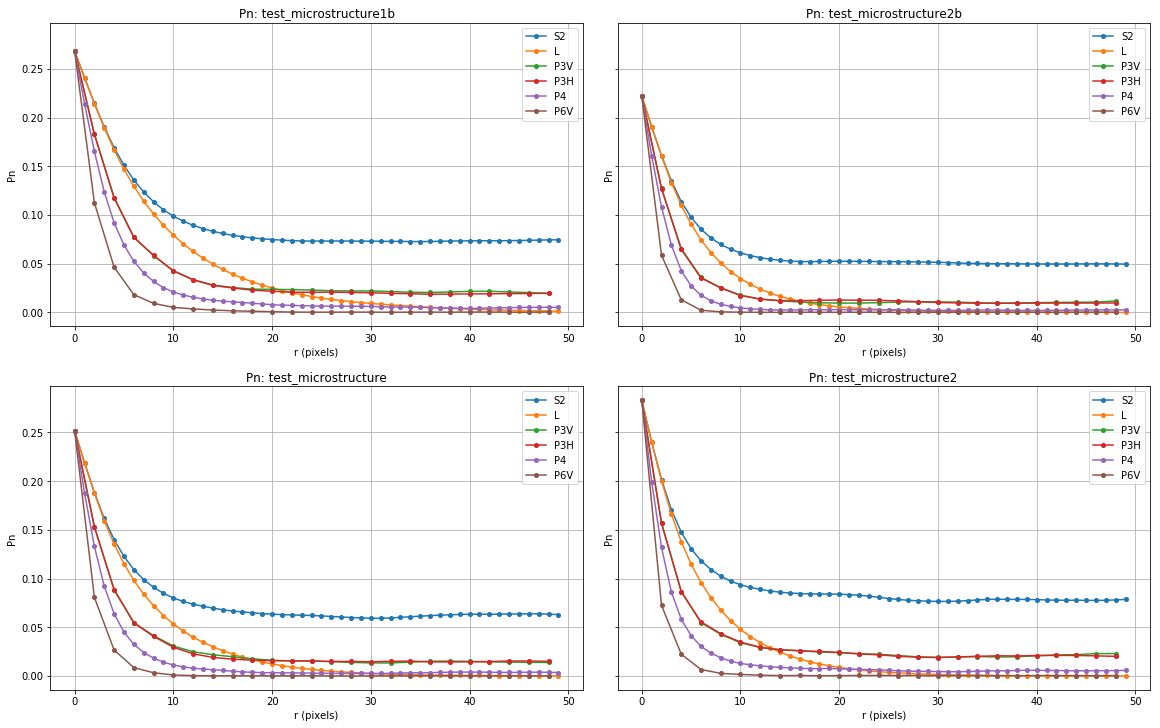

In [15]:
# plot Pn
print(os.getcwd())
rows = 2
cols = 2
figsize = (16, 10)
fig, axes = plt.subplots(rows, cols, sharey=True, figsize=figsize, constrained_layout=True)


axes[1,0].set_title('Pn: %s' % imct_microstructure.name)
axes[1,0].set_ylabel('Pn')
axes[1,0].set_xlabel('r (pixels)')
axes[1,0].plot(imct_PnS2[0:50,0], imct_PnS2[0:50,1], 'o', ls='-', ms=4, markevery=None, label='S2')
axes[1,0].plot(imct_microstructure.polytope_L[0:50,0], imct_microstructure.polytope_L[0:50,1], 'o', ls='-', ms=4, markevery=None, label='L')
axes[1,0].plot(imct_microstructure.polytope_P3V[0:50:2,0], imct_microstructure.polytope_P3V[0:50:2,1], 'o', ls='-', ms=4, markevery=None, label='P3V')
axes[1,0].plot(imct_microstructure.polytope_P3H[0:50:2,0], imct_microstructure.polytope_P3H[0:50:2,1], 'o', ls='-', ms=4, markevery=None, label='P3H')
axes[1,0].plot(imct_microstructure.polytope_P4[0:50,0], imct_microstructure.polytope_P4[0:50,1], 'o', ls='-', ms=4, markevery=None, label='P4')
axes[1,0].plot(imct_microstructure.polytope_P6V[0:50:2,0], imct_microstructure.polytope_P6V[0:50:2,1], 'o', ls='-', ms=4, markevery=None, label='P6V')

axes[1,0].grid(True)
axes[1,0].legend()


axes[1,1].set_title('Pn: %s' % imct2_microstructure.name)
axes[1,1].set_ylabel('Pn')
axes[1,1].set_xlabel('r (pixels)')
axes[1,1].plot(imct2_PnS2[0:50,0], imct2_PnS2[0:50,1], 'o', ls='-', ms=4, markevery=None, label='S2')
axes[1,1].plot(imct2_microstructure.polytope_L[0:50,0], imct2_microstructure.polytope_L[0:50,1], 'o', ls='-', ms=4, markevery=None, label='L')
axes[1,1].plot(imct2_microstructure.polytope_P3V[0:50:2,0], imct2_microstructure.polytope_P3V[0:50:2,1], 'o', ls='-', ms=4, markevery=None, label='P3V')
axes[1,1].plot(imct2_microstructure.polytope_P3H[0:50:2,0], imct2_microstructure.polytope_P3H[0:50:2,1], 'o', ls='-', ms=4, markevery=None, label='P3H')
axes[1,1].plot(imct2_microstructure.polytope_P4[0:50,0], imct2_microstructure.polytope_P4[0:50,1], 'o', ls='-', ms=4, markevery=None, label='P4')
axes[1,1].plot(imct2_microstructure.polytope_P6V[0:50:2,0], imct2_microstructure.polytope_P6V[0:50:2,1], 'o', ls='-', ms=4, markevery=None, label='P6V')

axes[1,1].grid(True)
axes[1,1].legend()

axes[0,0].set_title('Pn: %s' % imct1b_microstructure.name)
axes[0,0].set_ylabel('Pn')
axes[0,0].set_xlabel('r (pixels)')
axes[0,0].plot(imct1b_PnS2[0:50,0], imct1b_PnS2[0:50,1], 'o', ls='-', ms=4, markevery=None, label='S2')
axes[0,0].plot(imct1b_microstructure.polytope_L[0:50,0], imct1b_microstructure.polytope_L[0:50,1], 'o', ls='-', ms=4, markevery=None, label='L')
axes[0,0].plot(imct1b_microstructure.polytope_P3V[0:50:2,0], imct1b_microstructure.polytope_P3V[0:50:2,1], 'o', ls='-', ms=4, markevery=None, label='P3V')
axes[0,0].plot(imct1b_microstructure.polytope_P3H[0:50:2,0], imct1b_microstructure.polytope_P3H[0:50:2,1], 'o', ls='-', ms=4, markevery=None, label='P3H')
axes[0,0].plot(imct1b_microstructure.polytope_P4[0:50,0], imct1b_microstructure.polytope_P4[0:50,1], 'o', ls='-', ms=4, markevery=None, label='P4')
axes[0,0].plot(imct1b_microstructure.polytope_P6V[0:50:2,0], imct1b_microstructure.polytope_P6V[0:50:2,1], 'o', ls='-', ms=4, markevery=None, label='P6V')

axes[0,0].grid(True)
axes[0,0].legend()


axes[0,1].set_title('Pn: %s' % imct2b_microstructure.name)
axes[0,1].set_ylabel('Pn')
axes[0,1].set_xlabel('r (pixels)')
axes[0,1].plot(imct2b_PnS2[0:50,0], imct2b_PnS2[0:50,1], 'o', ls='-', ms=4, markevery=None, label='S2')
axes[0,1].plot(imct2b_microstructure.polytope_L[0:50,0], imct2b_microstructure.polytope_L[0:50,1], 'o', ls='-', ms=4, markevery=None, label='L')
axes[0,1].plot(imct2b_microstructure.polytope_P3V[0:50:2,0], imct2b_microstructure.polytope_P3V[0:50:2,1], 'o', ls='-', ms=4, markevery=None, label='P3V')
axes[0,1].plot(imct2b_microstructure.polytope_P3H[0:50:2,0], imct2b_microstructure.polytope_P3H[0:50:2,1], 'o', ls='-', ms=4, markevery=None, label='P3H')
axes[0,1].plot(imct2b_microstructure.polytope_P4[0:50,0], imct2b_microstructure.polytope_P4[0:50,1], 'o', ls='-', ms=4, markevery=None, label='P4')
axes[0,1].plot(imct2b_microstructure.polytope_P6V[0:50:2,0], imct2b_microstructure.polytope_P6V[0:50:2,1], 'o', ls='-', ms=4, markevery=None, label='P6V')

axes[0,1].grid(True)
axes[0,1].legend()

plt.savefig('./Plots/Pn_r50_TopBottom_twoimages_test.tif', dpi=400)

/Users/ivanvasconcelos/Work/Material/Code/Material/material_lib


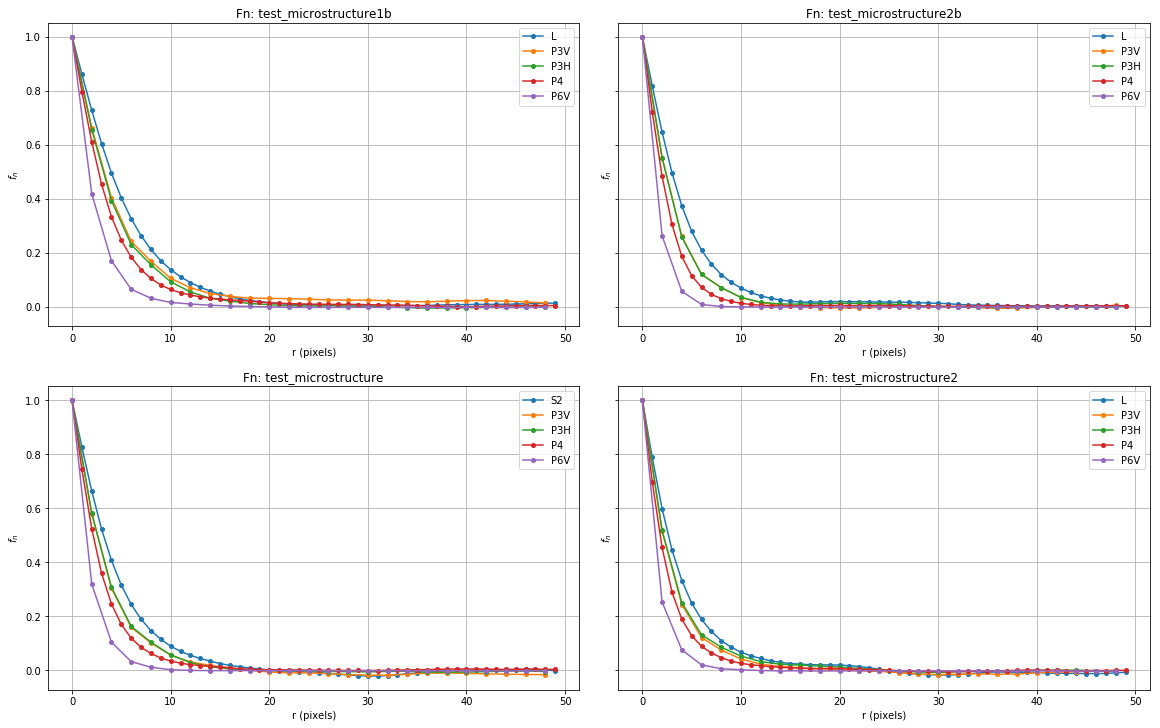

In [16]:
# plot Fn
print(os.getcwd())
rows = 2
cols = 2
figsize = (16, 10)
fig, axes = plt.subplots(rows, cols, sharey=True, figsize=figsize, constrained_layout=True)


axes[1,0].set_title('Fn: %s' % imct_microstructure.name)
axes[1,0].set_ylabel('$f_n$')
axes[1,0].set_xlabel('r (pixels)')
axes[1,0].plot(imct_microstructure.scal_autocov[0:50,0], imct_microstructure.scal_autocov[0:50,1], 'o', ls='-', ms=4, markevery=None, label='S2')
axes[1,0].plot(imct_microstructure.polyfn_P3V[0:50:2,0], imct_microstructure.polyfn_P3V[0:50:2,1], 'o', ls='-', ms=4, markevery=None, label='P3V')
axes[1,0].plot(imct_microstructure.polyfn_P3H[0:50:2,0], imct_microstructure.polyfn_P3H[0:50:2,1], 'o', ls='-', ms=4, markevery=None, label='P3H')
axes[1,0].plot(imct_microstructure.polyfn_P4[0:50,0], imct_microstructure.polyfn_P4[0:50,1], 'o', ls='-', ms=4, markevery=None, label='P4')
axes[1,0].plot(imct_microstructure.polyfn_P6V[0:50:2,0], imct_microstructure.polyfn_P6V[0:50:2,1], 'o', ls='-', ms=4, markevery=None, label='P6V')

axes[1,0].grid(True)
axes[1,0].legend()


axes[1,1].set_title('Fn: %s' % imct2_microstructure.name)
axes[1,1].set_ylabel('$f_n$')
axes[1,1].set_xlabel('r (pixels)')
axes[1,1].plot(imct2_microstructure.scal_autocov[0:50,0], imct2_microstructure.scal_autocov[0:50,1], 'o', ls='-', ms=4, markevery=None, label='L')
axes[1,1].plot(imct2_microstructure.polyfn_P3V[0:50:2,0], imct2_microstructure.polyfn_P3V[0:50:2,1], 'o', ls='-', ms=4, markevery=None, label='P3V')
axes[1,1].plot(imct2_microstructure.polyfn_P3H[0:50:2,0], imct2_microstructure.polyfn_P3H[0:50:2,1], 'o', ls='-', ms=4, markevery=None, label='P3H')
axes[1,1].plot(imct2_microstructure.polyfn_P4[0:50,0], imct2_microstructure.polyfn_P4[0:50,1], 'o', ls='-', ms=4, markevery=None, label='P4')
axes[1,1].plot(imct2_microstructure.polyfn_P6V[0:50:2,0], imct2_microstructure.polyfn_P6V[0:50:2,1], 'o', ls='-', ms=4, markevery=None, label='P6V')

axes[1,1].grid(True)
axes[1,1].legend()

axes[0,0].set_title('Fn: %s' % imct1b_microstructure.name)
axes[0,0].set_ylabel('$f_n$')
axes[0,0].set_xlabel('r (pixels)')
axes[0,0].plot(imct1b_microstructure.scal_autocov[0:50,0], imct1b_microstructure.scal_autocov[0:50,1], 'o', ls='-', ms=4, markevery=None, label='L')
axes[0,0].plot(imct1b_microstructure.polyfn_P3V[0:50:2,0], imct1b_microstructure.polyfn_P3V[0:50:2,1], 'o', ls='-', ms=4, markevery=None, label='P3V')
axes[0,0].plot(imct1b_microstructure.polyfn_P3H[0:50:2,0], imct1b_microstructure.polyfn_P3H[0:50:2,1], 'o', ls='-', ms=4, markevery=None, label='P3H')
axes[0,0].plot(imct1b_microstructure.polyfn_P4[0:50,0], imct1b_microstructure.polyfn_P4[0:50,1], 'o', ls='-', ms=4, markevery=None, label='P4')
axes[0,0].plot(imct1b_microstructure.polyfn_P6V[0:50:2,0], imct1b_microstructure.polyfn_P6V[0:50:2,1], 'o', ls='-', ms=4, markevery=None, label='P6V')

axes[0,0].grid(True)
axes[0,0].legend()


axes[0,1].set_title('Fn: %s' % imct2b_microstructure.name)
axes[0,1].set_ylabel('$f_n$')
axes[0,1].set_xlabel('r (pixels)')
axes[0,1].plot(imct2b_microstructure.scal_autocov[0:50,0], imct2b_microstructure.scal_autocov[0:50,1], 'o', ls='-', ms=4, markevery=None, label='L')
axes[0,1].plot(imct2b_microstructure.polyfn_P3V[0:50:2,0], imct2b_microstructure.polyfn_P3V[0:50:2,1], 'o', ls='-', ms=4, markevery=None, label='P3V')
axes[0,1].plot(imct2b_microstructure.polyfn_P3H[0:50:2,0], imct2b_microstructure.polyfn_P3H[0:50:2,1], 'o', ls='-', ms=4, markevery=None, label='P3H')
axes[0,1].plot(imct2b_microstructure.polyfn_P4[0:50,0], imct2b_microstructure.polyfn_P4[0:50,1], 'o', ls='-', ms=4, markevery=None, label='P4')
axes[0,1].plot(imct2b_microstructure.polyfn_P6V[0:50:2,0], imct2b_microstructure.polyfn_P6V[0:50:2,1], 'o', ls='-', ms=4, markevery=None, label='P6V')

axes[0,1].grid(True)
axes[0,1].legend()

plt.savefig('./Plots/Fn_r50_TopBottom_twoimages_test.tif', dpi=400)

/Users/ivanvasconcelos/Work/Material/Code/Material/material_lib


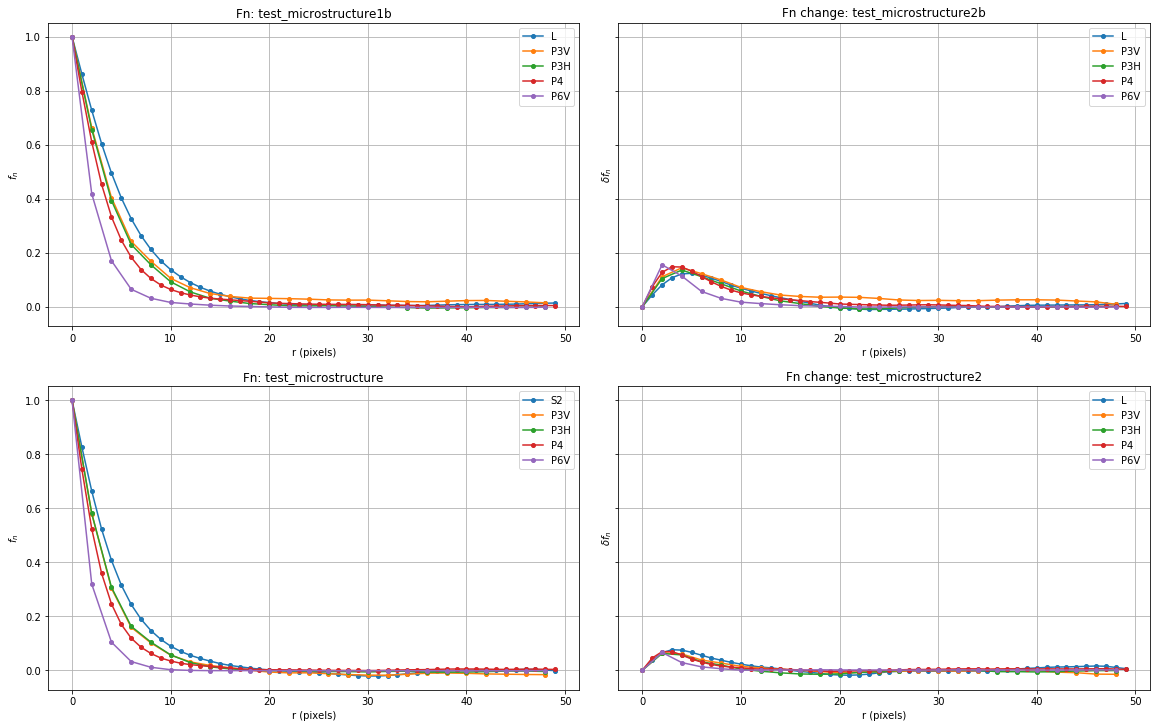

In [17]:
# plot Fn
print(os.getcwd())
rows = 2
cols = 2
figsize = (16, 10)
fig, axes = plt.subplots(rows, cols, sharey=True, figsize=figsize, constrained_layout=True)


axes[1,0].set_title('Fn: %s' % imct_microstructure.name)
axes[1,0].set_ylabel('$f_n$')
axes[1,0].set_xlabel('r (pixels)')
axes[1,0].plot(imct_microstructure.scal_autocov[0:50,0], imct_microstructure.scal_autocov[0:50,1], 'o', ls='-', ms=4, markevery=None, label='S2')
axes[1,0].plot(imct_microstructure.polyfn_P3V[0:50:2,0], imct_microstructure.polyfn_P3V[0:50:2,1], 'o', ls='-', ms=4, markevery=None, label='P3V')
axes[1,0].plot(imct_microstructure.polyfn_P3H[0:50:2,0], imct_microstructure.polyfn_P3H[0:50:2,1], 'o', ls='-', ms=4, markevery=None, label='P3H')
axes[1,0].plot(imct_microstructure.polyfn_P4[0:50,0], imct_microstructure.polyfn_P4[0:50,1], 'o', ls='-', ms=4, markevery=None, label='P4')
axes[1,0].plot(imct_microstructure.polyfn_P6V[0:50:2,0], imct_microstructure.polyfn_P6V[0:50:2,1], 'o', ls='-', ms=4, markevery=None, label='P6V')

axes[1,0].grid(True)
axes[1,0].legend()


axes[1,1].set_title('Fn change: %s' % imct2_microstructure.name)
axes[1,1].set_ylabel('$\delta f_n$')
axes[1,1].set_xlabel('r (pixels)')
axes[1,1].plot(imct2_microstructure.scal_autocov[0:50,0], imct_microstructure.scal_autocov[0:50,1] - imct2_microstructure.scal_autocov[0:50,1], 'o', ls='-', ms=4, markevery=None, label='L')
axes[1,1].plot(imct2_microstructure.polyfn_P3V[0:50:2,0], imct_microstructure.polyfn_P3V[0:50:2,1] - imct2_microstructure.polyfn_P3V[0:50:2,1], 'o', ls='-', ms=4, markevery=None, label='P3V')
axes[1,1].plot(imct2_microstructure.polyfn_P3H[0:50:2,0], imct_microstructure.polyfn_P3H[0:50:2,1] - imct2_microstructure.polyfn_P3H[0:50:2,1], 'o', ls='-', ms=4, markevery=None, label='P3H')
axes[1,1].plot(imct2_microstructure.polyfn_P4[0:50,0], imct_microstructure.polyfn_P4[0:50,1] - imct2_microstructure.polyfn_P4[0:50,1], 'o', ls='-', ms=4, markevery=None, label='P4')
axes[1,1].plot(imct2_microstructure.polyfn_P6V[0:50:2,0], imct_microstructure.polyfn_P6V[0:50:2,1] - imct2_microstructure.polyfn_P6V[0:50:2,1], 'o', ls='-', ms=4, markevery=None, label='P6V')

axes[1,1].grid(True)
axes[1,1].legend()

axes[0,0].set_title('Fn: %s' % imct1b_microstructure.name)
axes[0,0].set_ylabel('$f_n$')
axes[0,0].set_xlabel('r (pixels)')
axes[0,0].plot(imct1b_microstructure.scal_autocov[0:50,0], imct1b_microstructure.scal_autocov[0:50,1], 'o', ls='-', ms=4, markevery=None, label='L')
axes[0,0].plot(imct1b_microstructure.polyfn_P3V[0:50:2,0], imct1b_microstructure.polyfn_P3V[0:50:2,1], 'o', ls='-', ms=4, markevery=None, label='P3V')
axes[0,0].plot(imct1b_microstructure.polyfn_P3H[0:50:2,0], imct1b_microstructure.polyfn_P3H[0:50:2,1], 'o', ls='-', ms=4, markevery=None, label='P3H')
axes[0,0].plot(imct1b_microstructure.polyfn_P4[0:50,0], imct1b_microstructure.polyfn_P4[0:50,1], 'o', ls='-', ms=4, markevery=None, label='P4')
axes[0,0].plot(imct1b_microstructure.polyfn_P6V[0:50:2,0], imct1b_microstructure.polyfn_P6V[0:50:2,1], 'o', ls='-', ms=4, markevery=None, label='P6V')

axes[0,0].grid(True)
axes[0,0].legend()


axes[0,1].set_title('Fn change: %s' % imct2b_microstructure.name)
axes[0,1].set_ylabel('$\delta f_n$')
axes[0,1].set_xlabel('r (pixels)')
axes[0,1].plot(imct2b_microstructure.scal_autocov[0:50,0], imct1b_microstructure.scal_autocov[0:50,1] - imct2b_microstructure.scal_autocov[0:50,1], 'o', ls='-', ms=4, markevery=None, label='L')
axes[0,1].plot(imct2b_microstructure.polyfn_P3V[0:50:2,0], imct1b_microstructure.polyfn_P3V[0:50:2,1] - imct2b_microstructure.polyfn_P3V[0:50:2,1], 'o', ls='-', ms=4, markevery=None, label='P3V')
axes[0,1].plot(imct2b_microstructure.polyfn_P3H[0:50:2,0], imct1b_microstructure.polyfn_P3H[0:50:2,1] - imct2b_microstructure.polyfn_P3H[0:50:2,1], 'o', ls='-', ms=4, markevery=None, label='P3H')
axes[0,1].plot(imct2b_microstructure.polyfn_P4[0:50,0], imct1b_microstructure.polyfn_P4[0:50,1] - imct2b_microstructure.polyfn_P4[0:50,1], 'o', ls='-', ms=4, markevery=None, label='P4')
axes[0,1].plot(imct2b_microstructure.polyfn_P6V[0:50:2,0], imct1b_microstructure.polyfn_P6V[0:50:2,1] - imct2b_microstructure.polyfn_P6V[0:50:2,1], 'o', ls='-', ms=4, markevery=None, label='P6V')

axes[0,1].grid(True)
axes[0,1].legend()

plt.savefig('./Plots/ChangeFn_r50_TopBottom_twoimages_test.tif', dpi=400)

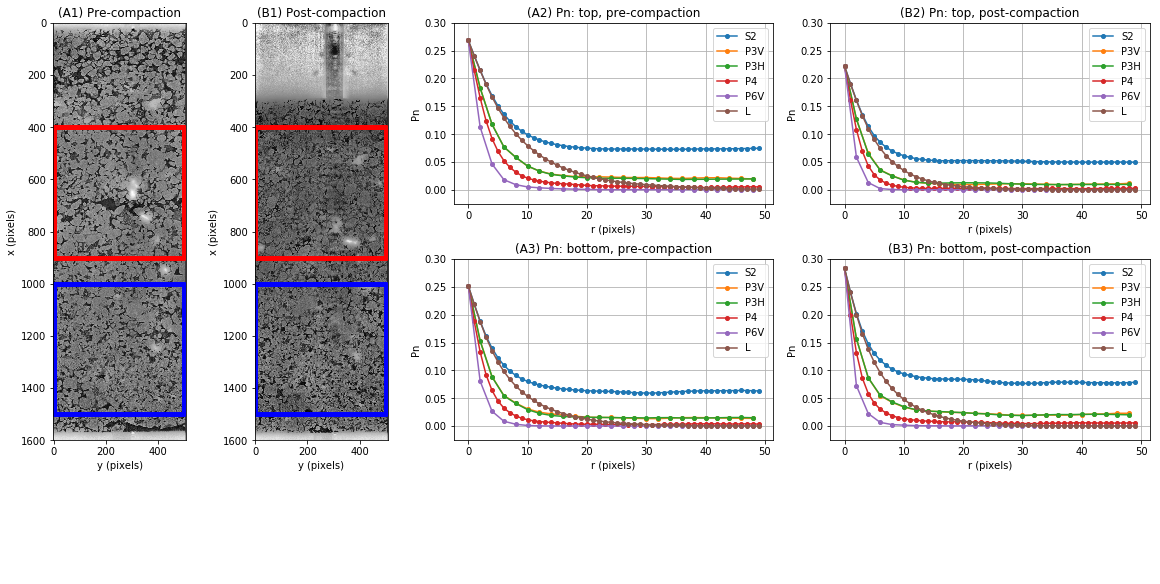

In [18]:
from matplotlib.collections import PatchCollection
from matplotlib.patches import Rectangle
import matplotlib.patches as patches
from skimage import exposure

figsize = (16, 8)
fig = plt.figure(figsize=figsize, constrained_layout=True)
gs = fig.add_gridspec(5, 6)

Rects = []
Rect1 = Rectangle((500, 901), 501, 501, fill=False, edgecolor='Green')
Rects.append(Rect1)
Rect2 = Rectangle((500, 1501), 501, 501, fill=False, edgecolor='Red')
Rects.append(Rect2)
pc = PatchCollection(Rects)

f_ax1 = fig.add_subplot(gs[0:4, 0])
f_ax1.set_title('(A1) Pre-compaction')
f_ax1.set_ylabel('x (pixels)')
f_ax1.set_xlabel('y (pixels)')
f_ax1.imshow(exposure.equalize_adapthist(img_ct[:,494:1003], clip_limit=par['clip_limit']), cmap=plt.cm.gray)
f_ax1.plot([0,0,501,501,0],[400,901,901,400,400],'r',lw=5)
f_ax1.plot([0,0,501,501,0],[1000,1501,1501,1000,1000],'b',lw=5)


f_ax2 = fig.add_subplot(gs[0:4, 1])
f_ax2.set_title('(B1) Post-compaction')
f_ax2.set_ylabel('x (pixels)')
f_ax2.set_xlabel('y (pixels)')
f_ax2.imshow(exposure.equalize_adapthist(img2_ct[:,494:1003], clip_limit=par['clip_limit']), cmap=plt.cm.gray)
f_ax2.plot([0,0,501,501,0],[400,901,901,400,400],'r',lw=5)
f_ax2.plot([0,0,501,501,0],[1000,1501,1501,1000,1000],'b',lw=5)

f_ax3 = fig.add_subplot(gs[0:2, 2:4])
f_ax3.set_title('(A2) Pn: top, pre-compaction')
f_ax3.set_ylabel('Pn')
f_ax3.set_xlabel('r (pixels)')
f_ax3.plot(imct1b_PnS2[0:50,0], imct1b_PnS2[0:50,1], 'o', ls='-', ms=4, markevery=None, label='S2')
f_ax3.plot(imct1b_microstructure.polytope_P3V[0:50:2,0], imct1b_microstructure.polytope_P3V[0:50:2,1], 'o', ls='-', ms=4, markevery=None, label='P3V')
f_ax3.plot(imct1b_microstructure.polytope_P3H[0:50:2,0], imct1b_microstructure.polytope_P3H[0:50:2,1], 'o', ls='-', ms=4, markevery=None, label='P3H')
f_ax3.plot(imct1b_microstructure.polytope_P4[0:50,0], imct1b_microstructure.polytope_P4[0:50,1], 'o', ls='-', ms=4, markevery=None, label='P4')
f_ax3.plot(imct1b_microstructure.polytope_P6V[0:50:2,0], imct1b_microstructure.polytope_P6V[0:50:2,1], 'o', ls='-', ms=4, markevery=None, label='P6V')
f_ax3.plot(imct1b_microstructure.polytope_L[0:50,0], imct1b_microstructure.polytope_L[0:50,1], 'o', ls='-', ms=4, markevery=None, label='L')
f_ax3.set_ylim([-0.025, 0.3])
f_ax3.grid(True)
f_ax3.legend()


f_ax4 = fig.add_subplot(gs[2:4, 2:4])
f_ax4.set_title('(A3) Pn: bottom, pre-compaction')
f_ax4.set_ylabel('Pn')
f_ax4.set_xlabel('r (pixels)')
f_ax4.plot(imct_PnS2[0:50,0], imct_PnS2[0:50,1], 'o', ls='-', ms=4, markevery=None, label='S2')
f_ax4.plot(imct_microstructure.polytope_P3V[0:50:2,0], imct_microstructure.polytope_P3V[0:50:2,1], 'o', ls='-', ms=4, markevery=None, label='P3V')
f_ax4.plot(imct_microstructure.polytope_P3H[0:50:2,0], imct_microstructure.polytope_P3H[0:50:2,1], 'o', ls='-', ms=4, markevery=None, label='P3H')
f_ax4.plot(imct_microstructure.polytope_P4[0:50,0], imct_microstructure.polytope_P4[0:50,1], 'o', ls='-', ms=4, markevery=None, label='P4')
f_ax4.plot(imct_microstructure.polytope_P6V[0:50:2,0], imct_microstructure.polytope_P6V[0:50:2,1], 'o', ls='-', ms=4, markevery=None, label='P6V')
f_ax4.plot(imct_microstructure.polytope_L[0:50,0], imct_microstructure.polytope_L[0:50,1], 'o', ls='-', ms=4, markevery=None, label='L')
f_ax4.set_ylim([-0.025, 0.3])
f_ax4.grid(True)
f_ax4.legend()

f_ax5 = fig.add_subplot(gs[0:2, 4:6])
f_ax5.set_title('(B2) Pn: top, post-compaction')
f_ax5.set_ylabel('Pn')
f_ax5.set_xlabel('r (pixels)')
f_ax5.plot(imct2b_PnS2[0:50,0], imct2b_PnS2[0:50,1], 'o', ls='-', ms=4, markevery=None, label='S2')
f_ax5.plot(imct2b_microstructure.polytope_P3V[0:50:2,0], imct2b_microstructure.polytope_P3V[0:50:2,1], 'o', ls='-', ms=4, markevery=None, label='P3V')
f_ax5.plot(imct2b_microstructure.polytope_P3H[0:50:2,0], imct2b_microstructure.polytope_P3H[0:50:2,1], 'o', ls='-', ms=4, markevery=None, label='P3H')
f_ax5.plot(imct2b_microstructure.polytope_P4[0:50,0], imct2b_microstructure.polytope_P4[0:50,1], 'o', ls='-', ms=4, markevery=None, label='P4')
f_ax5.plot(imct2b_microstructure.polytope_P6V[0:50:2,0], imct2b_microstructure.polytope_P6V[0:50:2,1], 'o', ls='-', ms=4, markevery=None, label='P6V')
f_ax5.plot(imct2b_microstructure.polytope_L[0:50,0], imct2b_microstructure.polytope_L[0:50,1], 'o', ls='-', ms=4, markevery=None, label='L')
f_ax5.set_ylim([-0.025, 0.3])
f_ax5.grid(True)
f_ax5.legend()


f_ax6 = fig.add_subplot(gs[2:4, 4:6])
f_ax6.set_title('(B3) Pn: bottom, post-compaction')
f_ax6.set_ylabel('Pn')
f_ax6.set_xlabel('r (pixels)')
f_ax6.plot(imct2_PnS2[0:50,0], imct2_PnS2[0:50,1], 'o', ls='-', ms=4, markevery=None, label='S2')
f_ax6.plot(imct2_microstructure.polytope_P3V[0:50:2,0], imct2_microstructure.polytope_P3V[0:50:2,1], 'o', ls='-', ms=4, markevery=None, label='P3V')
f_ax6.plot(imct2_microstructure.polytope_P3H[0:50:2,0], imct2_microstructure.polytope_P3H[0:50:2,1], 'o', ls='-', ms=4, markevery=None, label='P3H')
f_ax6.plot(imct2_microstructure.polytope_P4[0:50,0], imct2_microstructure.polytope_P4[0:50,1], 'o', ls='-', ms=4, markevery=None, label='P4')
f_ax6.plot(imct2_microstructure.polytope_P6V[0:50:2,0], imct2_microstructure.polytope_P6V[0:50:2,1], 'o', ls='-', ms=4, markevery=None, label='P6V')
f_ax6.plot(imct2_microstructure.polytope_L[0:50,0], imct2_microstructure.polytope_L[0:50,1], 'o', ls='-', ms=4, markevery=None, label='L')
f_ax6.set_ylim([-0.025, 0.3])
f_ax6.grid(True)
f_ax6.legend()

plt.savefig('./Plots/Compaction_Images_Pn_PrePostComparison.tif', dpi=400)
plt.savefig('./Plots/Compaction_Images_Pn_PrePostComparison_200dpi.tif', dpi=200)

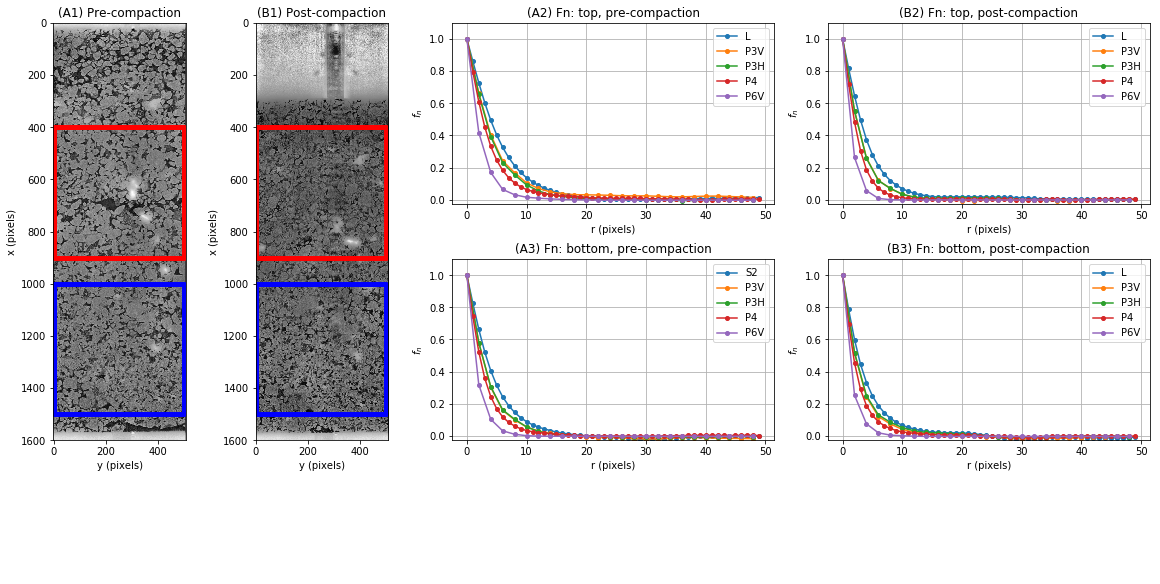

In [19]:
# Plot results with Fn

figsize = (16, 8)
fig = plt.figure(figsize=figsize, constrained_layout=True)
gs = fig.add_gridspec(5, 6)

Rects = []
Rect1 = Rectangle((500, 901), 501, 501, fill=False, edgecolor='Green')
Rects.append(Rect1)
Rect2 = Rectangle((500, 1501), 501, 501, fill=False, edgecolor='Red')
Rects.append(Rect2)
pc = PatchCollection(Rects)

f_ax1 = fig.add_subplot(gs[0:4, 0])
f_ax1.set_title('(A1) Pre-compaction')
f_ax1.set_ylabel('x (pixels)')
f_ax1.set_xlabel('y (pixels)')
f_ax1.imshow(exposure.equalize_adapthist(img_ct[:,494:1003], clip_limit=par['clip_limit']), cmap=plt.cm.gray)
f_ax1.plot([0,0,501,501,0],[400,901,901,400,400],'r',lw=5)
f_ax1.plot([0,0,501,501,0],[1000,1501,1501,1000,1000],'b',lw=5)


f_ax2 = fig.add_subplot(gs[0:4, 1])
f_ax2.set_title('(B1) Post-compaction')
f_ax2.set_ylabel('x (pixels)')
f_ax2.set_xlabel('y (pixels)')
f_ax2.imshow(exposure.equalize_adapthist(img2_ct[:,494:1003], clip_limit=par['clip_limit']), cmap=plt.cm.gray)
f_ax2.plot([0,0,501,501,0],[400,901,901,400,400],'r',lw=5)
f_ax2.plot([0,0,501,501,0],[1000,1501,1501,1000,1000],'b',lw=5)

f_ax3 = fig.add_subplot(gs[0:2, 2:4])
f_ax3.set_title('(A2) Fn: top, pre-compaction')
f_ax3.set_ylabel('$f_n$')
f_ax3.set_xlabel('r (pixels)')
f_ax3.plot(imct1b_microstructure.scal_autocov[0:50,0], imct1b_microstructure.scal_autocov[0:50,1], 'o', ls='-', ms=4, markevery=None, label='L')
f_ax3.plot(imct1b_microstructure.polyfn_P3V[0:50:2,0], imct1b_microstructure.polyfn_P3V[0:50:2,1], 'o', ls='-', ms=4, markevery=None, label='P3V')
f_ax3.plot(imct1b_microstructure.polyfn_P3H[0:50:2,0], imct1b_microstructure.polyfn_P3H[0:50:2,1], 'o', ls='-', ms=4, markevery=None, label='P3H')
f_ax3.plot(imct1b_microstructure.polyfn_P4[0:50,0], imct1b_microstructure.polyfn_P4[0:50,1], 'o', ls='-', ms=4, markevery=None, label='P4')
f_ax3.plot(imct1b_microstructure.polyfn_P6V[0:50:2,0], imct1b_microstructure.polyfn_P6V[0:50:2,1], 'o', ls='-', ms=4, markevery=None, label='P6V')
f_ax3.set_ylim([-0.025, 1.1])
f_ax3.grid(True)
f_ax3.legend()


f_ax4 = fig.add_subplot(gs[2:4, 2:4])
f_ax4.set_title('(A3) Fn: bottom, pre-compaction')
f_ax4.set_ylabel('$f_n$')
f_ax4.set_xlabel('r (pixels)')
f_ax4.plot(imct_microstructure.scal_autocov[0:50,0], imct_microstructure.scal_autocov[0:50,1], 'o', ls='-', ms=4, markevery=None, label='S2')
f_ax4.plot(imct_microstructure.polyfn_P3V[0:50:2,0], imct_microstructure.polyfn_P3V[0:50:2,1], 'o', ls='-', ms=4, markevery=None, label='P3V')
f_ax4.plot(imct_microstructure.polyfn_P3H[0:50:2,0], imct_microstructure.polyfn_P3H[0:50:2,1], 'o', ls='-', ms=4, markevery=None, label='P3H')
f_ax4.plot(imct_microstructure.polyfn_P4[0:50,0], imct_microstructure.polyfn_P4[0:50,1], 'o', ls='-', ms=4, markevery=None, label='P4')
f_ax4.plot(imct_microstructure.polyfn_P6V[0:50:2,0], imct_microstructure.polyfn_P6V[0:50:2,1], 'o', ls='-', ms=4, markevery=None, label='P6V')
f_ax4.set_ylim([-0.025, 1.1])
f_ax4.grid(True)
f_ax4.legend()

f_ax5 = fig.add_subplot(gs[0:2, 4:6])
f_ax5.set_title('(B2) Fn: top, post-compaction')
f_ax5.set_ylabel('$f_n$')
f_ax5.set_xlabel('r (pixels)')
f_ax5.plot(imct2b_microstructure.scal_autocov[0:50,0], imct2b_microstructure.scal_autocov[0:50,1], 'o', ls='-', ms=4, markevery=None, label='L')
f_ax5.plot(imct2b_microstructure.polyfn_P3V[0:50:2,0], imct2b_microstructure.polyfn_P3V[0:50:2,1], 'o', ls='-', ms=4, markevery=None, label='P3V')
f_ax5.plot(imct2b_microstructure.polyfn_P3H[0:50:2,0], imct2b_microstructure.polyfn_P3H[0:50:2,1], 'o', ls='-', ms=4, markevery=None, label='P3H')
f_ax5.plot(imct2b_microstructure.polyfn_P4[0:50,0], imct2b_microstructure.polyfn_P4[0:50,1], 'o', ls='-', ms=4, markevery=None, label='P4')
f_ax5.plot(imct2b_microstructure.polyfn_P6V[0:50:2,0], imct2b_microstructure.polyfn_P6V[0:50:2,1], 'o', ls='-', ms=4, markevery=None, label='P6V')
f_ax5.set_ylim([-0.025, 1.1])
f_ax5.grid(True)
f_ax5.legend()


f_ax6 = fig.add_subplot(gs[2:4, 4:6])
f_ax6.set_title('(B3) Fn: bottom, post-compaction')
f_ax6.set_ylabel('$f_n$')
f_ax6.set_xlabel('r (pixels)')
f_ax6.plot(imct2_microstructure.scal_autocov[0:50,0], imct2_microstructure.scal_autocov[0:50,1], 'o', ls='-', ms=4, markevery=None, label='L')
f_ax6.plot(imct2_microstructure.polyfn_P3V[0:50:2,0], imct2_microstructure.polyfn_P3V[0:50:2,1], 'o', ls='-', ms=4, markevery=None, label='P3V')
f_ax6.plot(imct2_microstructure.polyfn_P3H[0:50:2,0], imct2_microstructure.polyfn_P3H[0:50:2,1], 'o', ls='-', ms=4, markevery=None, label='P3H')
f_ax6.plot(imct2_microstructure.polyfn_P4[0:50,0], imct2_microstructure.polyfn_P4[0:50,1], 'o', ls='-', ms=4, markevery=None, label='P4')
f_ax6.plot(imct2_microstructure.polyfn_P6V[0:50:2,0], imct2_microstructure.polyfn_P6V[0:50:2,1], 'o', ls='-', ms=4, markevery=None, label='P6V')
f_ax6.set_ylim([-0.025, 1.1])
f_ax6.grid(True)
f_ax6.legend()

plt.savefig('./Plots/Compaction_Images_Fn_PrePostComparison.tif', dpi=400)
plt.savefig('./Plots/Compaction_Images_Fn_PrePostComparison_200dpi.tif', dpi=200)

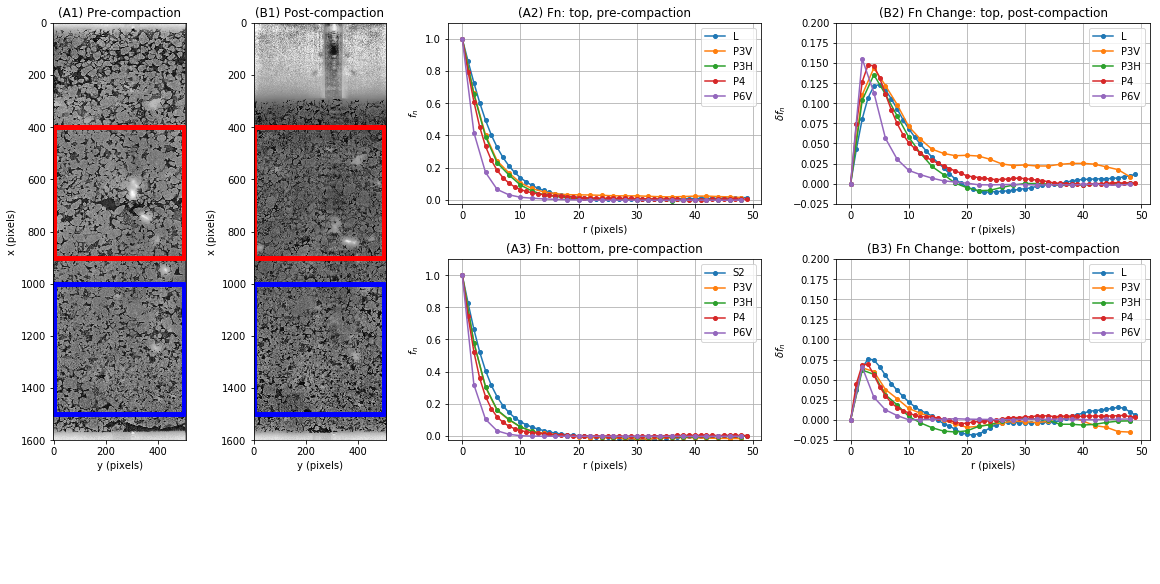

In [20]:
# Plot results with Fn

figsize = (16, 8)
fig = plt.figure(figsize=figsize, constrained_layout=True)
gs = fig.add_gridspec(5, 6)

Rects = []
Rect1 = Rectangle((500, 901), 501, 501, fill=False, edgecolor='Green')
Rects.append(Rect1)
Rect2 = Rectangle((500, 1501), 501, 501, fill=False, edgecolor='Red')
Rects.append(Rect2)
pc = PatchCollection(Rects)

f_ax1 = fig.add_subplot(gs[0:4, 0])
f_ax1.set_title('(A1) Pre-compaction')
f_ax1.set_ylabel('x (pixels)')
f_ax1.set_xlabel('y (pixels)')
f_ax1.imshow(exposure.equalize_adapthist(img_ct[:,494:1003], clip_limit=par['clip_limit']), cmap=plt.cm.gray)
f_ax1.plot([0,0,501,501,0],[400,901,901,400,400],'r',lw=5)
f_ax1.plot([0,0,501,501,0],[1000,1501,1501,1000,1000],'b',lw=5)


f_ax2 = fig.add_subplot(gs[0:4, 1])
f_ax2.set_title('(B1) Post-compaction')
f_ax2.set_ylabel('x (pixels)')
f_ax2.set_xlabel('y (pixels)')
f_ax2.imshow(exposure.equalize_adapthist(img2_ct[:,494:1003], clip_limit=par['clip_limit']), cmap=plt.cm.gray)
f_ax2.plot([0,0,501,501,0],[400,901,901,400,400],'r',lw=5)
f_ax2.plot([0,0,501,501,0],[1000,1501,1501,1000,1000],'b',lw=5)

f_ax3 = fig.add_subplot(gs[0:2, 2:4])
f_ax3.set_title('(A2) Fn: top, pre-compaction')
f_ax3.set_ylabel('$f_n$')
f_ax3.set_xlabel('r (pixels)')
f_ax3.plot(imct1b_microstructure.scal_autocov[0:50,0], imct1b_microstructure.scal_autocov[0:50,1], 'o', ls='-', ms=4, markevery=None, label='L')
f_ax3.plot(imct1b_microstructure.polyfn_P3V[0:50:2,0], imct1b_microstructure.polyfn_P3V[0:50:2,1], 'o', ls='-', ms=4, markevery=None, label='P3V')
f_ax3.plot(imct1b_microstructure.polyfn_P3H[0:50:2,0], imct1b_microstructure.polyfn_P3H[0:50:2,1], 'o', ls='-', ms=4, markevery=None, label='P3H')
f_ax3.plot(imct1b_microstructure.polyfn_P4[0:50,0], imct1b_microstructure.polyfn_P4[0:50,1], 'o', ls='-', ms=4, markevery=None, label='P4')
f_ax3.plot(imct1b_microstructure.polyfn_P6V[0:50:2,0], imct1b_microstructure.polyfn_P6V[0:50:2,1], 'o', ls='-', ms=4, markevery=None, label='P6V')
f_ax3.set_ylim([-0.025, 1.1])
f_ax3.grid(True)
f_ax3.legend()


f_ax4 = fig.add_subplot(gs[2:4, 2:4])
f_ax4.set_title('(A3) Fn: bottom, pre-compaction')
f_ax4.set_ylabel('$f_n$')
f_ax4.set_xlabel('r (pixels)')
f_ax4.plot(imct_microstructure.scal_autocov[0:50,0], imct_microstructure.scal_autocov[0:50,1], 'o', ls='-', ms=4, markevery=None, label='S2')
f_ax4.plot(imct_microstructure.polyfn_P3V[0:50:2,0], imct_microstructure.polyfn_P3V[0:50:2,1], 'o', ls='-', ms=4, markevery=None, label='P3V')
f_ax4.plot(imct_microstructure.polyfn_P3H[0:50:2,0], imct_microstructure.polyfn_P3H[0:50:2,1], 'o', ls='-', ms=4, markevery=None, label='P3H')
f_ax4.plot(imct_microstructure.polyfn_P4[0:50,0], imct_microstructure.polyfn_P4[0:50,1], 'o', ls='-', ms=4, markevery=None, label='P4')
f_ax4.plot(imct_microstructure.polyfn_P6V[0:50:2,0], imct_microstructure.polyfn_P6V[0:50:2,1], 'o', ls='-', ms=4, markevery=None, label='P6V')
f_ax4.set_ylim([-0.025, 1.1])
f_ax4.grid(True)
f_ax4.legend()

f_ax5 = fig.add_subplot(gs[0:2, 4:6])
f_ax5.set_title('(B2) Fn Change: top, post-compaction')
f_ax5.set_ylabel('$\delta f_n$')
f_ax5.set_xlabel('r (pixels)')
f_ax5.plot(imct2b_microstructure.scal_autocov[0:50,0], imct1b_microstructure.scal_autocov[0:50,1] - imct2b_microstructure.scal_autocov[0:50,1], 'o', ls='-', ms=4, markevery=None, label='L')
f_ax5.plot(imct2b_microstructure.polyfn_P3V[0:50:2,0], imct1b_microstructure.polyfn_P3V[0:50:2,1] - imct2b_microstructure.polyfn_P3V[0:50:2,1], 'o', ls='-', ms=4, markevery=None, label='P3V')
f_ax5.plot(imct2b_microstructure.polyfn_P3H[0:50:2,0], imct1b_microstructure.polyfn_P3H[0:50:2,1] - imct2b_microstructure.polyfn_P3H[0:50:2,1], 'o', ls='-', ms=4, markevery=None, label='P3H')
f_ax5.plot(imct2b_microstructure.polyfn_P4[0:50,0], imct1b_microstructure.polyfn_P4[0:50,1] - imct2b_microstructure.polyfn_P4[0:50,1], 'o', ls='-', ms=4, markevery=None, label='P4')
f_ax5.plot(imct2b_microstructure.polyfn_P6V[0:50:2,0], imct1b_microstructure.polyfn_P6V[0:50:2,1] - imct2b_microstructure.polyfn_P6V[0:50:2,1], 'o', ls='-', ms=4, markevery=None, label='P6V')
f_ax5.set_ylim([-0.025, 0.2])
f_ax5.grid(True)
f_ax5.legend()


f_ax6 = fig.add_subplot(gs[2:4, 4:6])
f_ax6.set_title('(B3) Fn Change: bottom, post-compaction')
f_ax6.set_ylabel('$\delta f_n$')
f_ax6.set_xlabel('r (pixels)')
f_ax6.plot(imct2_microstructure.scal_autocov[0:50,0], imct_microstructure.scal_autocov[0:50,1] - imct2_microstructure.scal_autocov[0:50,1], 'o', ls='-', ms=4, markevery=None, label='L')
f_ax6.plot(imct2_microstructure.polyfn_P3V[0:50:2,0], imct_microstructure.polyfn_P3V[0:50:2,1] - imct2_microstructure.polyfn_P3V[0:50:2,1], 'o', ls='-', ms=4, markevery=None, label='P3V')
f_ax6.plot(imct2_microstructure.polyfn_P3H[0:50:2,0], imct_microstructure.polyfn_P3H[0:50:2,1] - imct2_microstructure.polyfn_P3H[0:50:2,1], 'o', ls='-', ms=4, markevery=None, label='P3H')
f_ax6.plot(imct2_microstructure.polyfn_P4[0:50,0], imct_microstructure.polyfn_P4[0:50,1] - imct2_microstructure.polyfn_P4[0:50,1], 'o', ls='-', ms=4, markevery=None, label='P4')
f_ax6.plot(imct2_microstructure.polyfn_P6V[0:50:2,0], imct_microstructure.polyfn_P6V[0:50:2,1] - imct2_microstructure.polyfn_P6V[0:50:2,1], 'o', ls='-', ms=4, markevery=None, label='P6V')
f_ax6.set_ylim([-0.025, 0.2])
f_ax6.grid(True)
f_ax6.legend()

plt.savefig('./Plots/Compaction_Images_FnChange_PrePostComparison.tif', dpi=400)
plt.savefig('./Plots/Compaction_Images_FnChange_PrePostComparison_200dpi.tif', dpi=200)

#### Step 4: Effective properties

From the `uumatsci_utils.py` library, we now use the function `EffectiveAcoustic_fromS2_SCE_ver2` - which:
* calculates the effective acoustic properties from S2: through a frequency-dependent, strong-contrast expansion (SCE) 
* the default calculation is for a 3D effective medium  - 2D propagation is not yet implemented
* controlling parameters go in the `par` dictionary: check the source code for the `EffectiveAcoustic_fromS2_SCE_ver2` function to better understand the role of the parameters
* the calculation is accuracy is dependent on the **absolute values of wavenumber**, due to some of the underlying asymptotics of the SCE. This means there is a need to experiment with the choices of units depending on the desired scale - however - the underlying results are scale-independent (which is slightly confusing). 

Below are the initial results using the *Slochteren compaction experiment data from Suzanne Hangx*. Plese note these results are unpublished and therefore **confidential**.

In [71]:
#### Slochteren Compaction: phase properties

# Slochteren matrix
K_Slo = 12.0e+09 / (1 - 0.13)
Rho_Slo = 2030.0 / (1 - 0.19)
C_Slo = np.sqrt( K_Slo / Rho_Slo )
A_Slo = 1 / 250
print(C_Slo, K_Slo, Rho_Slo)

# Brine
K_wat = 2.4e+09
Rho_wat = 1030.0
A_wat = 1 / 50
C_wat = np.sqrt( K_wat / Rho_wat )
print(C_wat, K_wat, Rho_wat)

# Gas
K_dry = 142e+03
Rho_dry = 1.12
A_dry = 1 / 10
C_dry = np.sqrt( K_dry / Rho_dry )
print(C_dry, K_dry, Rho_dry)


# Scales
dr_CT = (5.0e-03) / 501 # approx. 5.0 mm across 501 pixels
Lambda_Slo_1Mhz = C_Slo / (1.0e06)
Lambda_Slo_2Mhz = C_Slo / (2.0e06)
Lambda_Slo_2khz = C_Slo / (0.2e06)
Lambda_Slo_100hz = C_Slo / (100)
Lambda_Slo_1khz = C_Slo / (1000)
print(dr_CT, Lambda_Slo_1Mhz, Lambda_Slo_1khz, Lambda_Slo_100hz)
print(Lambda_Slo_2Mhz/(dr_CT*100), Lambda_Slo_2khz/(dr_CT*100) )

2345.9863841952033 13793103448.275862 2506.1728395061727
1526.4655539443531 2400000000.0 1030.0
356.0698165889862 142000.0 1.12
9.980039920159681e-06 0.0023459863841952034 2.345986384195203 23.459863841952032
1.1753391784817968 11.753391784817968


In [77]:
#### Slochteren Compaction: effective propery parameters

# Brine filled
par_Slo_wat={'C_p': C_wat, 'C_q': C_Slo, 'A_p': A_wat, 'A_q': A_Slo, 
     'Rho_p': Rho_wat, 'Rho_q': Rho_wat, 
     'freq_beg': 0.3e06, 'nfreq': 100, 'freq_end': 1.5e06,
     'dr_scale': dr_CT, 'medium_dims': 3, 'return_Keff': True}

par_Slo_wat2={'C_p': C_wat, 'C_q': C_Slo, 'A_p': A_wat, 'A_q': A_Slo, 
     'Rho_p': Rho_wat, 'Rho_q': Rho_wat, 
     'freq_beg': 0.2, 'nfreq': 100, 'freq_end': 1.5,
     'dr_scale': 1e01, 'medium_dims': 3, 'return_Keff': True}

par_Slo_wat3={'C_p': C_wat, 'C_q': C_Slo, 'A_p': A_wat, 'A_q': A_Slo, 
     'Rho_p': Rho_wat, 'Rho_q': Rho_wat, 
     'freq_beg': 10, 'nfreq': 100, 'freq_end': 100,
     'dr_scale': dr_CT, 'medium_dims': 3, 'return_Keff': True}


# unit_scal = 3.0e02
# unit_scal = 2.5e02
par_Slo_watB={'C_p': C_wat * unit_scal, 'C_q': C_Slo* unit_scal, 'A_p': A_wat, 'A_q': A_Slo, 
     'Rho_p': Rho_wat/unit_scal**3, 'Rho_q': Rho_wat/unit_scal**3, 
     'scale_beg': 4.0, 'nfreq': 100, 'scale_end': 20.0,
     'dr_scale': dr_CT * unit_scal, 'corrlength_scaling': 20, 'medium_dims': 3, 'return_Keff': True}

par_Slo_dryB={'C_p': C_dry * unit_scal, 'C_q': C_Slo* unit_scal, 'A_p': A_dry, 'A_q': A_Slo, 
     'Rho_p': Rho_wat/unit_scal**3, 'Rho_q': Rho_wat/unit_scal**3, 
     'scale_beg': 4.0, 'nfreq': 100, 'scale_end': 20.0,
     'dr_scale': dr_CT * unit_scal, 'corrlength_scaling': 20, 'medium_dims': 3, 'return_Keff': True}


print(par_Slo_wat['C_p'], par_Slo_wat['C_q'])

1526.4655539443531 2345.9863841952033


In [78]:
#### Slochteren Compaction: effective propery calculation

### WATER-Filled
CT_S2_top_post = imct2b_PnS2
CT_S2_top_pre = imct1b_PnS2

CT_S2_bot_post = imct2_PnS2
CT_S2_bot_pre = imct_PnS2

CT_top_post_wat_c_eff, CT_top_post_wat_kappa_eff, CT_top_post_wat_freqs = uumat.EffectiveAcoustic_fromS2_SCE_ver2(CT_S2_top_post, par_Slo_watB)
CT_top_pre_wat_c_eff, CT_top_pre_wat_kappa_eff, CT_top_pre_wat_freqs = uumat.EffectiveAcoustic_fromS2_SCE_ver2(CT_S2_top_pre, par_Slo_watB)


CT_bot_post_wat_c_eff, CT_bot_post_wat_kappa_eff, CT_bot_post_wat_freqs = uumat.EffectiveAcoustic_fromS2_SCE_ver2(CT_S2_bot_post, par_Slo_watB)
CT_bot_pre_wat_c_eff, CT_bot_pre_wat_kappa_eff, CT_bot_pre_wat_freqs = uumat.EffectiveAcoustic_fromS2_SCE_ver2(CT_S2_bot_pre, par_Slo_watB)



In [79]:
#### Slochteren Compaction: effective propery calculation

### GAS-Filled
CT_top_post_dry_c_eff, CT_top_post_dry_kappa_eff, CT_top_post_dry_freqs = uumat.EffectiveAcoustic_fromS2_SCE_ver2(CT_S2_top_post, par_Slo_dryB)
CT_top_pre_dry_c_eff, CT_top_pre_dry_kappa_eff, CT_top_pre_dry_freqs = uumat.EffectiveAcoustic_fromS2_SCE_ver2(CT_S2_top_pre, par_Slo_dryB)


CT_bot_post_dry_c_eff, CT_bot_post_dry_kappa_eff, CT_bot_post_dry_freqs = uumat.EffectiveAcoustic_fromS2_SCE_ver2(CT_S2_bot_post, par_Slo_dryB)
CT_bot_pre_dry_c_eff, CT_bot_pre_dry_kappa_eff, CT_bot_pre_dry_freqs = uumat.EffectiveAcoustic_fromS2_SCE_ver2(CT_S2_bot_pre, par_Slo_dryB)


In [25]:
# check some numbers
print(CT_S2_bot_post[0:2])
print(CT_bot_post_wat_c_eff.real)

[[0.       0.28315 ]
 [1.       0.240228]]
[619444.33838559 619444.85923861 619445.40072863 619445.96283046
 619446.54551756 619447.14876272 619447.77253871 619448.41681899
 619449.08157837 619449.76679371 619450.4724445  619451.19851346
 619451.94498702 619452.71185571 619453.49911451 619454.30676299
 619455.13480545 619455.98325084 619456.8521126  619457.74140841
 619458.65115971 619459.58139127 619460.53213046 619461.50340662
 619462.4952502  619463.50769192 619464.54076183 619465.5944884
 619466.66889754 619467.76401169 619468.87984887 619470.01642187
 619471.17373743 619472.35179554 619473.55058887 619474.77010229
 619476.01031252 619477.27118793 619478.55268848 619479.85476586
 619481.17736369 619482.52041797 619483.8838576  619485.26760511
 619486.67157745 619488.09568694 619489.53984233 619491.00394986
 619492.4879145  619493.99164116 619495.51503592 619497.05800726
 619498.62046731 619500.20233298 619501.80352708 619503.42397929
 619505.06362707 619506.72241642 619508.40030245

/Users/ivanvasconcelos/Work/Material/Code/Material/material_lib


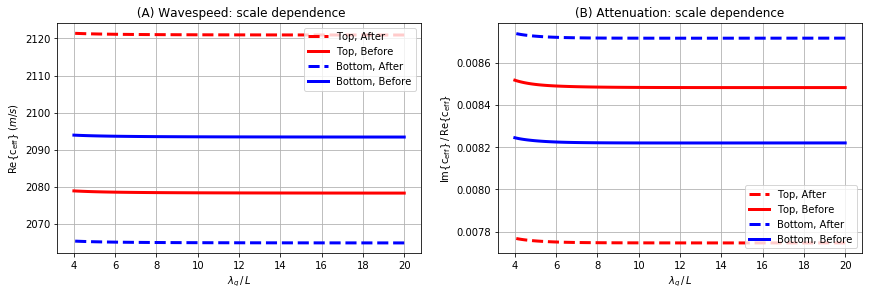

In [80]:
#### Slochteren Compaction: plots

### WATER filled
sample_scale = par_Slo_watB['corrlength_scaling'] * par_Slo_watB['dr_scale']
wavelengths = C_Slo * unit_scal / CT_bot_post_wat_freqs
propagation_scale = wavelengths / sample_scale

print(os.getcwd())
rows = 1
cols = 2
figsize = (12, 4)
fig, axes = plt.subplots(rows, cols, sharey=False, figsize=figsize, constrained_layout=True)


axes[0].set_title(' (A) Wavespeed: scale dependence')
axes[0].set_ylabel(r"${\rm{Re} \lbrace c_{eff} \rbrace} \; (m/s) $")
axes[0].set_xlabel(r"$ \lambda_q \, / \, L $")
axes[0].plot(propagation_scale, CT_top_post_wat_c_eff.real / unit_scal, color='red',  ls='--', ms=4, linewidth=3.0, markevery=None, label='Top, After')
axes[0].plot(propagation_scale, CT_top_pre_wat_c_eff.real / unit_scal, color='red',  ls='-', ms=4, linewidth=3.0, markevery=None, label='Top, Before')
axes[0].plot(propagation_scale, CT_bot_post_wat_c_eff.real / unit_scal, color='blue',  ls='--', ms=4, linewidth=3.0, markevery=None, label='Bottom, After')
axes[0].plot(propagation_scale, CT_bot_pre_wat_c_eff.real / unit_scal, color='blue',  ls='-', ms=4, linewidth=3.0, markevery=None, label='Bottom, Before')
#axes[0].set_ylim([0.7635, 0.765])
#axes[0].set_xlim([0.0, 0.5])
axes[0].grid(True)
axes[0].legend()

axes[1].set_title('(B) Attenuation: scale dependence')
axes[1].set_ylabel(r"${\rm{Im} \lbrace c_{eff} \rbrace} \, / \, \rm{Re} \lbrace c_{eff} \rbrace$")
axes[1].set_xlabel(r"$ \lambda_q \, / \, L$")
axes[1].plot(propagation_scale, (CT_top_post_wat_c_eff.imag/CT_top_post_wat_c_eff.real), color='red',   ls='--', ms=4, linewidth=3.0, markevery=None, label='Top, After')
axes[1].plot(propagation_scale, (CT_top_pre_wat_c_eff.imag/CT_top_pre_wat_c_eff.real), color='red',   ls='-', ms=4, linewidth=3.0, markevery=None, label='Top, Before')
axes[1].plot(propagation_scale, (CT_bot_post_wat_c_eff.imag/CT_bot_post_wat_c_eff.real), color='blue',   ls='--', ms=4, linewidth=3.0, markevery=None, label='Bottom, After')
axes[1].plot(propagation_scale, (CT_bot_pre_wat_c_eff.imag/CT_bot_pre_wat_c_eff.real), color='blue',   ls='-', ms=4, linewidth=3.0, markevery=None, label='Bottom, Before')
#axes[1].set_xlim([0.0, 0.5])
#axes[1].set_ylim([0.0033, 0.004])
axes[1].grid(True)
axes[1].legend()

plt.savefig('./Plots/Compaction_EffAcoustics_PrePostComparison_Water.tif', dpi=400)
plt.savefig('./Plots/Compaction_EffAcoustics_PrePostComparison_Water_100dpi.tif', dpi=100)

/Users/ivanvasconcelos/Work/Material/Code/Material/material_lib


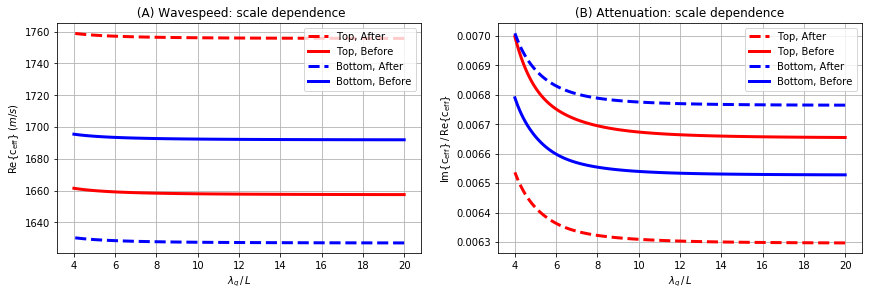

In [81]:
### GAS filled
sample_scale = par_Slo_dryB['corrlength_scaling'] * par_Slo_dryB['dr_scale']
wavelengths = C_Slo * unit_scal / CT_bot_post_dry_freqs
propagation_scale = wavelengths / sample_scale

print(os.getcwd())
rows = 1
cols = 2
figsize = (12, 4)
fig, axes = plt.subplots(rows, cols, sharey=False, figsize=figsize, constrained_layout=True)


axes[0].set_title(' (A) Wavespeed: scale dependence')
axes[0].set_ylabel(r"${\rm{Re} \lbrace c_{eff} \rbrace} \; (m/s) $")
axes[0].set_xlabel(r"$ \lambda_q \, / \, L $")
axes[0].plot(propagation_scale, CT_top_post_dry_c_eff.real / unit_scal, color='red',  ls='--', ms=4, linewidth=3.0, markevery=None, label='Top, After')
axes[0].plot(propagation_scale, CT_top_pre_dry_c_eff.real / unit_scal, color='red',  ls='-', ms=4, linewidth=3.0, markevery=None, label='Top, Before')
axes[0].plot(propagation_scale, CT_bot_post_dry_c_eff.real / unit_scal, color='blue',  ls='--', ms=4, linewidth=3.0, markevery=None, label='Bottom, After')
axes[0].plot(propagation_scale, CT_bot_pre_dry_c_eff.real / unit_scal, color='blue',  ls='-', ms=4, linewidth=3.0, markevery=None, label='Bottom, Before')
#axes[0].set_ylim([0.7635, 0.765])
#axes[0].set_xlim([0.0, 0.5])
axes[0].grid(True)
axes[0].legend()

axes[1].set_title('(B) Attenuation: scale dependence')
axes[1].set_ylabel(r"${\rm{Im} \lbrace c_{eff} \rbrace} \, / \, \rm{Re} \lbrace c_{eff} \rbrace$")
axes[1].set_xlabel(r"$ \lambda_q \, / \, L$")
axes[1].plot(propagation_scale, (CT_top_post_dry_c_eff.imag/CT_top_post_wat_c_eff.real), color='red',   ls='--', ms=4, linewidth=3.0, markevery=None, label='Top, After')
axes[1].plot(propagation_scale, (CT_top_pre_dry_c_eff.imag/CT_top_pre_wat_c_eff.real), color='red',   ls='-', ms=4, linewidth=3.0, markevery=None, label='Top, Before')
axes[1].plot(propagation_scale, (CT_bot_post_dry_c_eff.imag/CT_bot_post_wat_c_eff.real), color='blue',   ls='--', ms=4, linewidth=3.0, markevery=None, label='Bottom, After')
axes[1].plot(propagation_scale, (CT_bot_pre_dry_c_eff.imag/CT_bot_pre_wat_c_eff.real), color='blue',   ls='-', ms=4, linewidth=3.0, markevery=None, label='Bottom, Before')
#axes[1].set_xlim([0.0, 0.5])
#axes[1].set_ylim([0.0033, 0.004])
axes[1].grid(True)
axes[1].legend()

plt.savefig('./Plots/Compaction_EffAcoustics_PrePostComparison_Gas.tif', dpi=400)
plt.savefig('./Plots/Compaction_EffAcoustics_PrePostComparison_Gas_100dpi.tif', dpi=100)


In [88]:
print(1/(0.00655))
print(1/(0.0063))
print(6/152)


152.67175572519082
158.73015873015873
0.039473684210526314
